<a href="https://colab.research.google.com/github/gerogeykp/Data-Science/blob/main/DL_Assignmet_1_(Classification_Churn_Modelling)_George.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn Prediction For Bank Customer

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

## Improt Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Indest Data

In [8]:
df = pd.read_csv("Churn_Modelling.csv")

## Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [10]:
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.shape

(10000, 14)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [14]:
df.isnull().sum().any()

False

In [15]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
df.Exited = df.Exited.map({0:1,1:0})  #We change the "0" to "1" and "1" to "0".

In [17]:
df.Exited.value_counts()

1    7963
0    2037
Name: Exited, dtype: int64

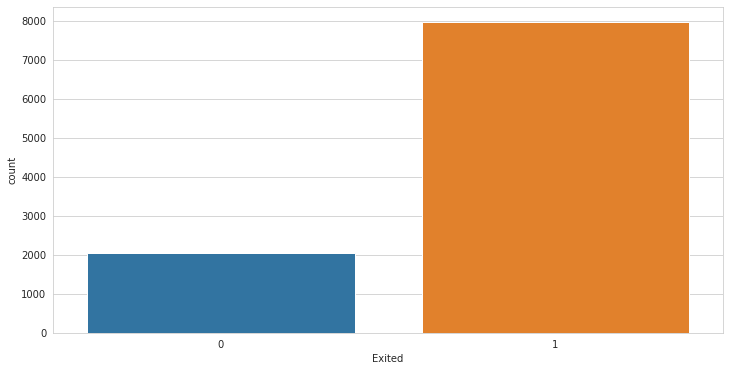

In [18]:
sns.countplot(df["Exited"]);

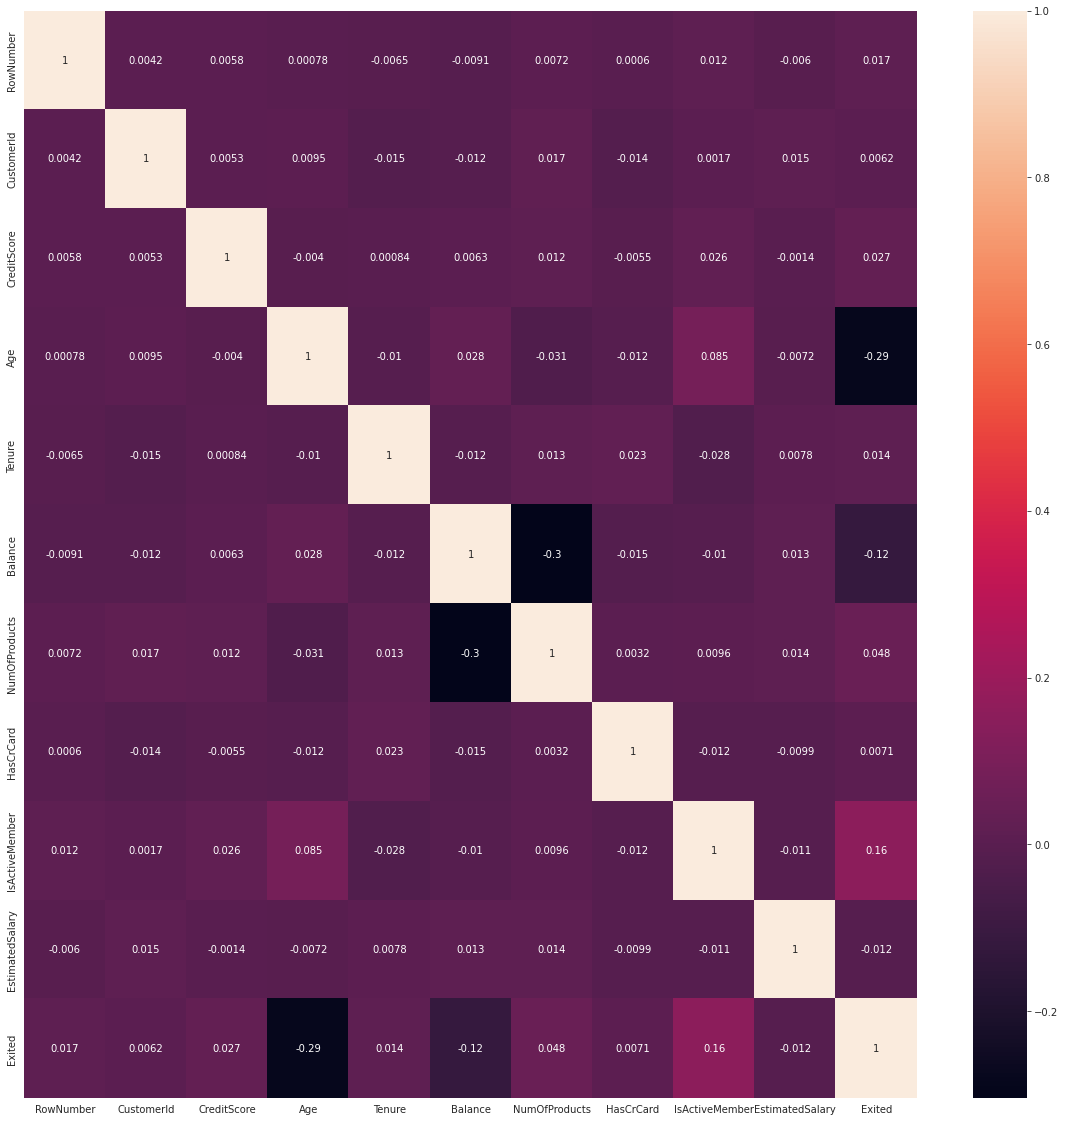

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

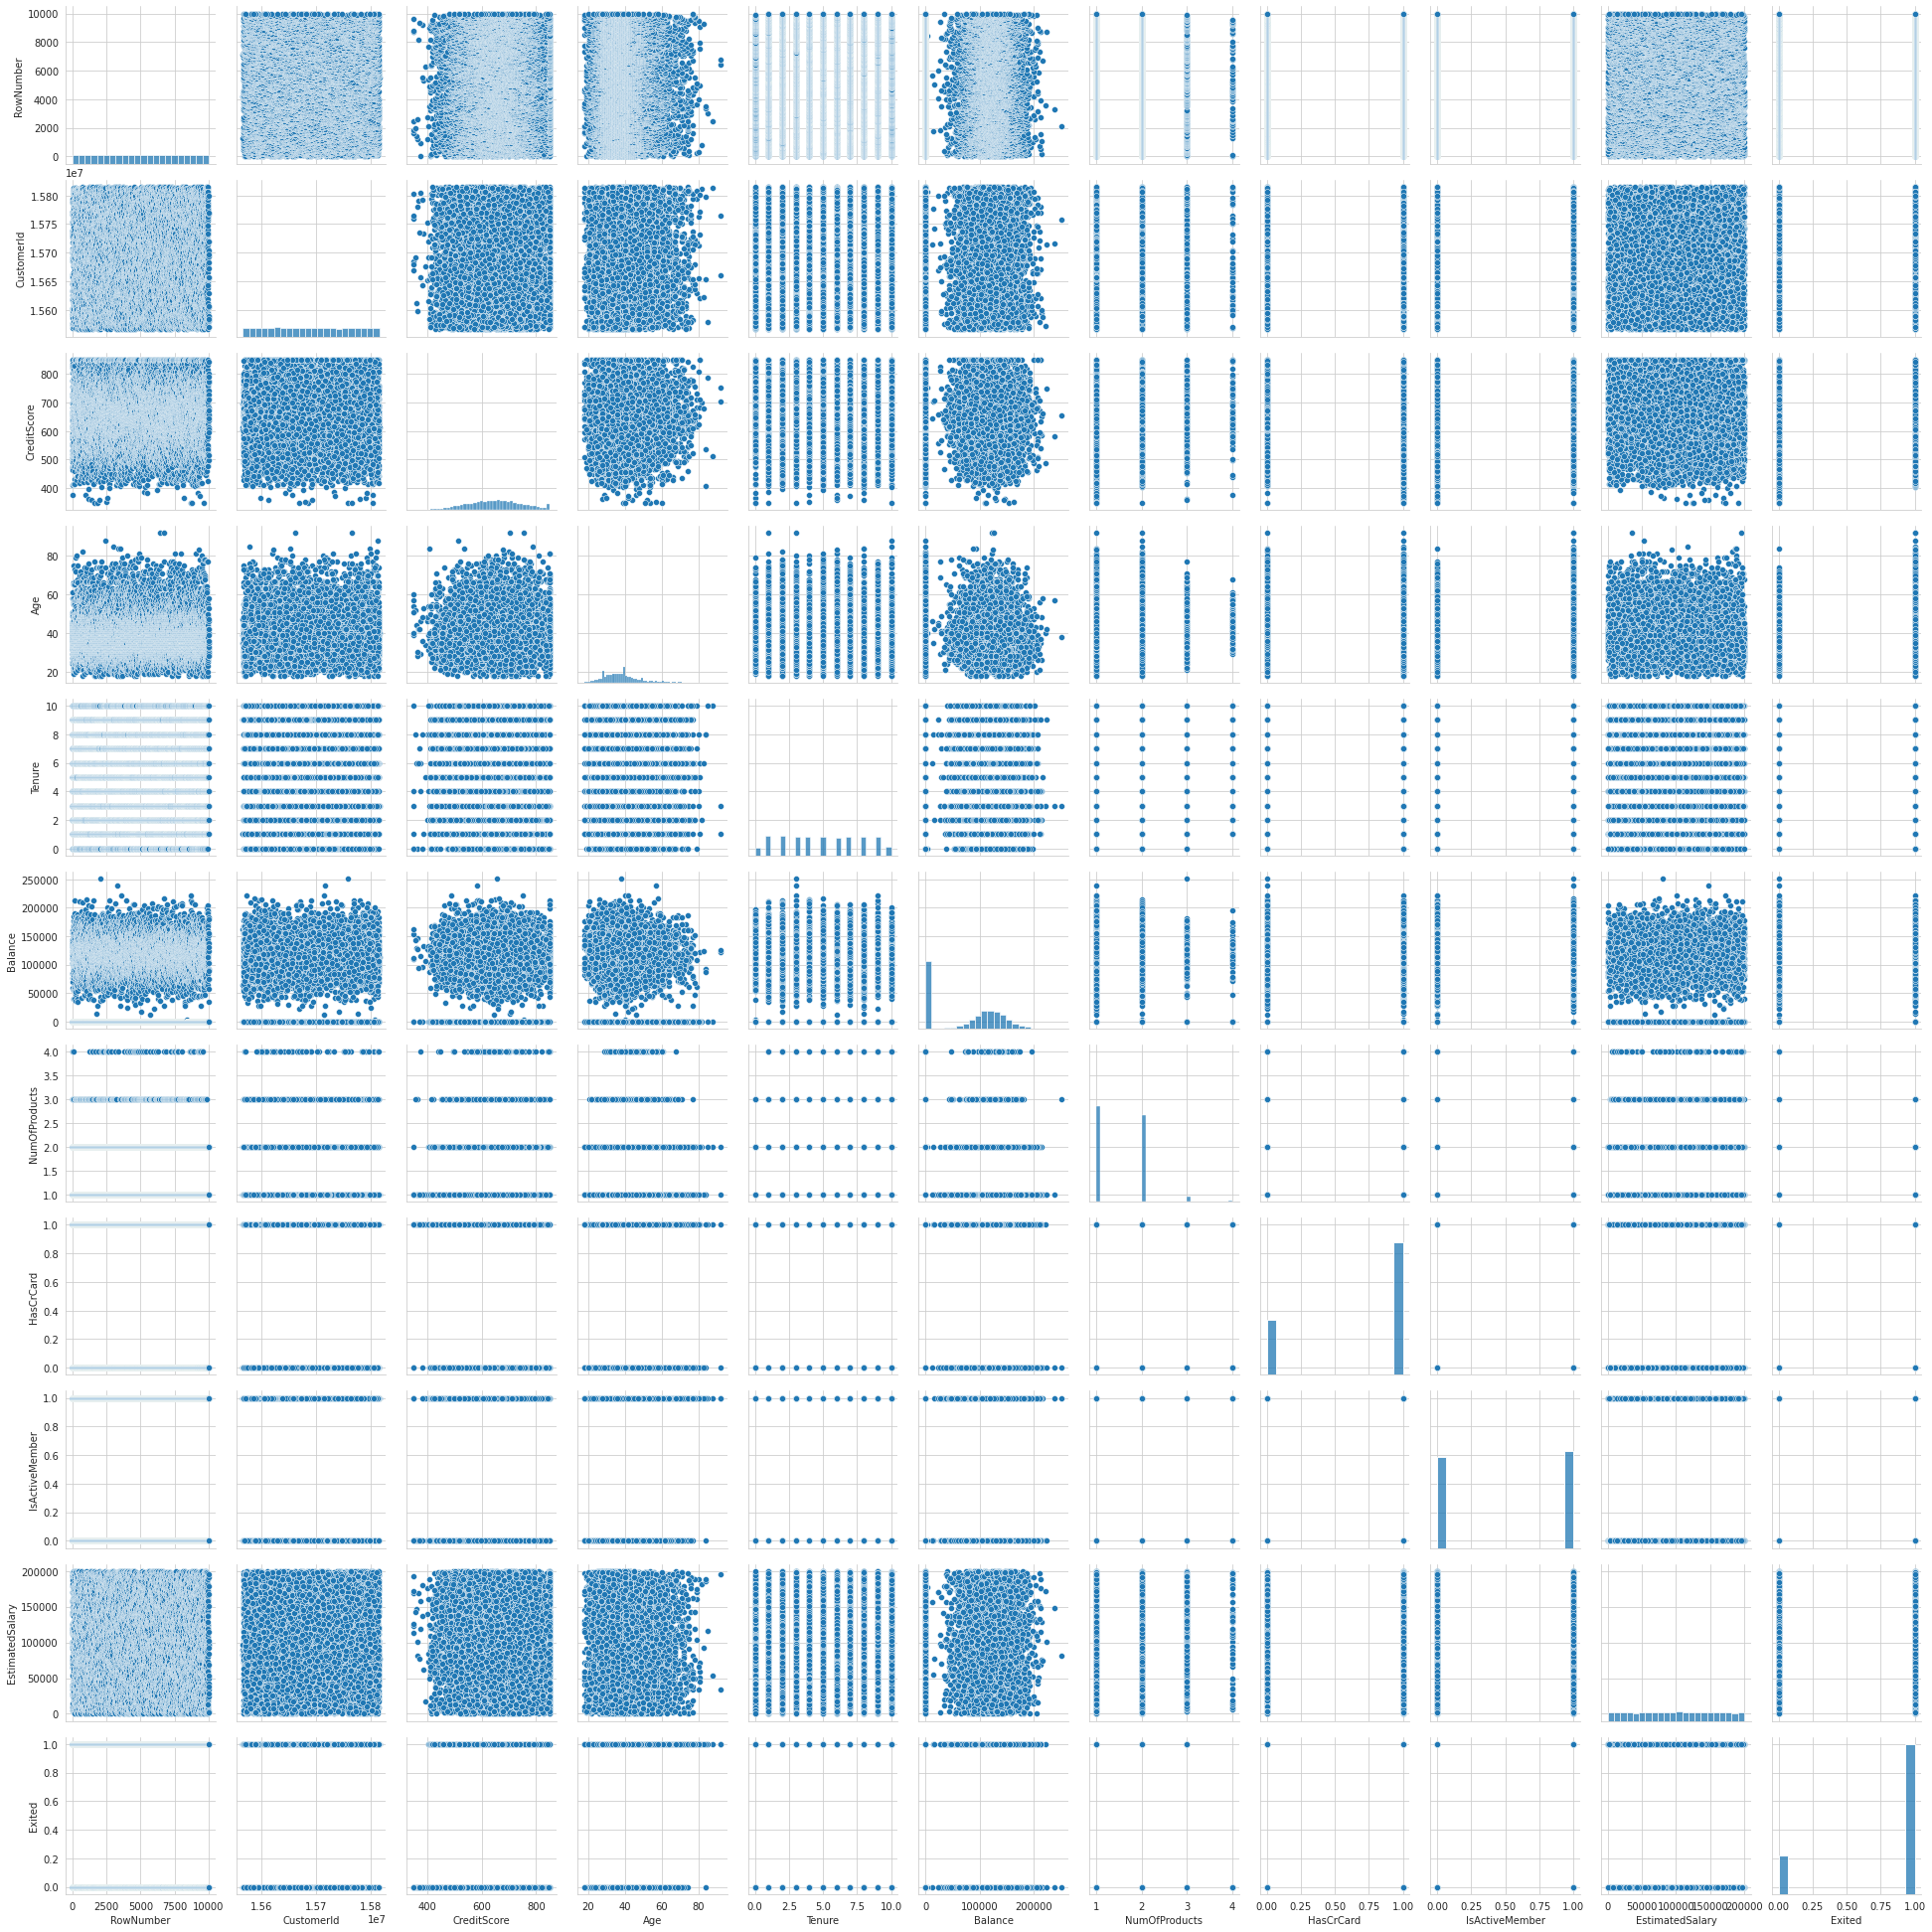

In [20]:
sns.pairplot(df)

In [21]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [22]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [23]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [24]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [25]:
drop_list = ["RowNumber", "CustomerId", "Surname"]

In [26]:
df=df.drop(drop_list, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,1
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,1


In [27]:
geo_dummy = pd.get_dummies(df["Geography"], prefix = "Geo")
df = pd.concat([df, geo_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,619,France,Female,42,2,0.000,1,1,1,101348.880,0,1,0,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,1,0,0,1
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,0,1,0,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,1,1,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,1,0,0,1


In [28]:
gender_dummy = pd.get_dummies(df["Gender"], prefix = "Gender")
df = pd.concat([df, gender_dummy], axis = 1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,France,Female,42,2,0.000,1,1,1,101348.880,0,1,0,0,1,0
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,1,0,0,1,1,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,0,1,0,0,1,0
3,699,France,Female,39,1,0.000,2,0,0,93826.630,1,1,0,0,1,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,1,0,0,1,1,0


In [29]:
df.shape

(10000, 16)

In [30]:
df.drop(["Geography","Gender"],axis=1,inplace = True)

In [31]:
df.shape

(10000, 14)

In [32]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Geo_France         0
Geo_Germany        0
Geo_Spain          0
Gender_Female      0
Gender_Male        0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Geo_France       10000 non-null  uint8  
 10  Geo_Germany      10000 non-null  uint8  
 11  Geo_Spain        10000 non-null  uint8  
 12  Gender_Female    10000 non-null  uint8  
 13  Gender_Male      10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.1 KB


## Preprocessing of Data
- Train | Test Split, Scalling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [35]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = 42)

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling & Model Performance

### Import related libraries

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [40]:
X_train.shape

(9000, 13)

In [41]:
X_test.shape

(1000, 13)

### Creating Model without class-weight

In [42]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [43]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
254/254 [==============================] - 4s 4ms/step - loss: 0.4946 - accuracy: 0.7832 - val_loss: 0.4753 - val_accuracy: 0.7889
Epoch 2/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4540 - accuracy: 0.8023 - val_loss: 0.4507 - val_accuracy: 0.8022
Epoch 3/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8106 - val_loss: 0.4403 - val_accuracy: 0.8122
Epoch 4/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4241 - accuracy: 0.8170 - val_loss: 0.4493 - val_accuracy: 0.8089
Epoch 5/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4126 - accuracy: 0.8223 - val_loss: 0.4189 - val_accuracy: 0.8244
Epoch 6/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.4003 - accuracy: 0.8284 - val_loss: 0.4083 - val_accuracy: 0.8244
Epoch 7/1000
254/254 [==============================] - 1s 4ms/step - loss: 0.3877 - accuracy: 0.8346 - val_loss: 0.3987 - val_accuracy:

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [45]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.495,0.783,0.475,0.789
1,0.454,0.802,0.451,0.802
2,0.435,0.811,0.440,0.812
3,0.424,0.817,0.449,0.809
4,0.413,0.822,0.419,0.824


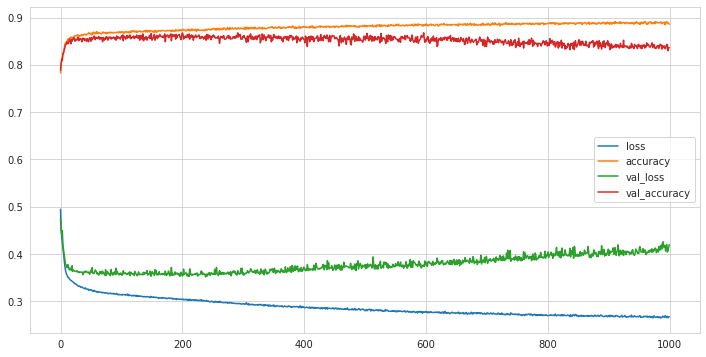

In [46]:
loss_df.plot();

In [47]:
model.evaluate(X_test, y_test, verbose=0)

[0.426565557718277, 0.8500000238418579]

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.426565557718277
accuracy :  0.8500000238418579


In [49]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 93 111]
 [ 39 757]]
              precision    recall  f1-score   support

           0       0.70      0.46      0.55       204
           1       0.87      0.95      0.91       796

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



### with class_weigth

In [50]:
weights = {0:0.01, 1:0.99}

In [51]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 1000, verbose=1, class_weight=weights)

Epoch 1/1000
254/254 [==============================] - 2s 5ms/step - loss: 0.0139 - accuracy: 0.8312 - val_loss: 0.9153 - val_accuracy: 0.8133
Epoch 2/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0100 - accuracy: 0.8223 - val_loss: 0.9318 - val_accuracy: 0.8133
Epoch 3/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0098 - accuracy: 0.8226 - val_loss: 0.9381 - val_accuracy: 0.8133
Epoch 4/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0097 - accuracy: 0.8228 - val_loss: 0.9398 - val_accuracy: 0.8122
Epoch 5/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0096 - accuracy: 0.8230 - val_loss: 0.9215 - val_accuracy: 0.8167
Epoch 6/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0096 - accuracy: 0.8240 - val_loss: 0.9375 - val_accuracy: 0.8144
Epoch 7/1000
254/254 [==============================] - 1s 5ms/step - loss: 0.0095 - accuracy: 0.8242 - val_loss: 0.9330 - val_accuracy:

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________


In [53]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.014,0.831,0.915,0.813
1,0.010,0.822,0.932,0.813
2,0.010,0.823,0.938,0.813
3,0.010,0.823,0.940,0.812
4,0.010,0.823,0.922,0.817


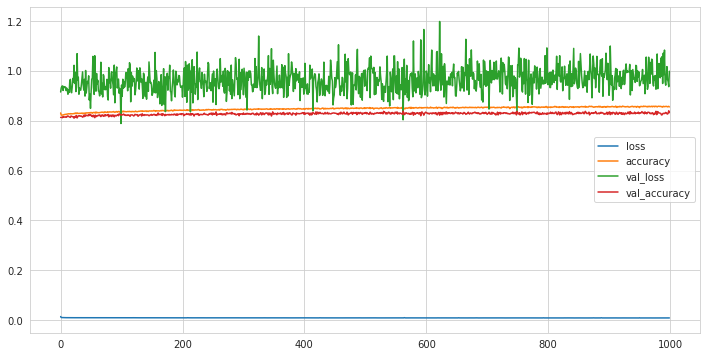

In [54]:
loss_df.plot();

In [55]:
model.evaluate(X_test, y_test, verbose=0)

[0.946069598197937, 0.8379999995231628]

In [56]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.946069598197937
accuracy :  0.8379999995231628


In [57]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 51 153]
 [  9 787]]
              precision    recall  f1-score   support

           0       0.85      0.25      0.39       204
           1       0.84      0.99      0.91       796

    accuracy                           0.84      1000
   macro avg       0.84      0.62      0.65      1000
weighted avg       0.84      0.84      0.80      1000



In [58]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

## GridSearchCV

In [62]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [59]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 30, activation = 'relu'))
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [60]:
early_stop = EarlyStopping(monitor = "accuracy", mode = "auto", verbose = 1, patience = 15)

In [63]:
classifier = KerasClassifier(build_fn = build_classifier, epochs = 200)
parameters = {'batch_size': [32, 64],
              'optimizer': ['adam', 'rmsprop', "SGD", "adagrad", "adadelta"]}
grid_model = GridSearchCV(estimator = classifier,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 48.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 80.3min finished


Epoch 1/200
282/282 [==============================] - 2s 4ms/step - loss: 0.4974 - accuracy: 0.7868
Epoch 2/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4586 - accuracy: 0.8032
Epoch 3/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4442 - accuracy: 0.8099
Epoch 4/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4312 - accuracy: 0.8161
Epoch 5/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4210 - accuracy: 0.8189
Epoch 6/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4125 - accuracy: 0.8204
Epoch 7/200
282/282 [==============================] - 1s 4ms/step - loss: 0.4023 - accuracy: 0.8273
Epoch 8/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3912 - accuracy: 0.8319
Epoch 9/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3800 - accuracy: 0.8369
Epoch 10/200
282/282 [==============================] - 1s 4ms/step - loss: 0.3702 - accura

GridSearchCV(cv=10, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ffaa5510190>,
             iid='deprecated', n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'optimizer': ['adam', 'rmsprop', 'SGD', 'adagrad',
                                       'adadelta']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

In [64]:
grid_model.best_score_

0.8576666666666666

In [65]:
grid_model.best_params_

{'batch_size': 32, 'optimizer': 'rmsprop'}

## Final Model and Model Deployment

In [68]:
import pickle
pickle.dump(scaler, open("scaler_churn", 'wb'))

In [69]:
model = Sequential()

model.add(Dense(30, activation = "relu"))
model.add(Dense(15, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [70]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 15)

In [71]:
model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 1000, verbose = 1,
          callbacks = [early_stop])

Epoch 1/1000
282/282 [==============================] - 2s 5ms/step - loss: 0.4869 - accuracy: 0.7968 - val_loss: 0.4603 - val_accuracy: 0.7960
Epoch 2/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4574 - accuracy: 0.8016 - val_loss: 0.4397 - val_accuracy: 0.8060
Epoch 3/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4438 - accuracy: 0.8117 - val_loss: 0.4313 - val_accuracy: 0.8060
Epoch 4/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4348 - accuracy: 0.8118 - val_loss: 0.4273 - val_accuracy: 0.8210
Epoch 5/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4286 - accuracy: 0.8151 - val_loss: 0.4191 - val_accuracy: 0.8240
Epoch 6/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8180 - val_loss: 0.4088 - val_accuracy: 0.8160
Epoch 7/1000
282/282 [==============================] - 1s 4ms/step - loss: 0.4174 - accuracy: 0.8190 - val_loss: 0.4039 - val_accuracy:

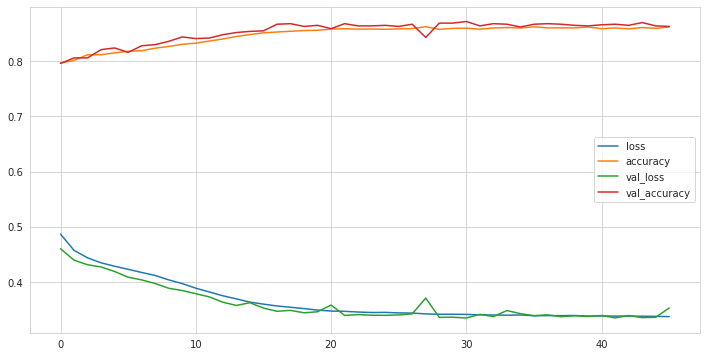

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [73]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 74 130]
 [  7 789]]
              precision    recall  f1-score   support

           0       0.91      0.36      0.52       204
           1       0.86      0.99      0.92       796

    accuracy                           0.86      1000
   macro avg       0.89      0.68      0.72      1000
weighted avg       0.87      0.86      0.84      1000



In [74]:
model.save('model_churnb.h5')

### Prediction

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model_churnb = load_model('model_churnb.h5')
scaler_churnb = pickle.load(open("scaler_churn", "rb"))

In [77]:
single_exited = df.drop('Exited', axis = 1).iloc[0:1, :]
single_exited

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,1,0


In [78]:
single_exited = scaler_churnb.transform(single_exited)
single_exited

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50673489, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [79]:
(model_churnb.predict(single_exited) > 0.5).astype("int32")

array([[1]], dtype=int32)

In [80]:
df["Exited"].iloc[0]

0